**Analisis de calidad de los datos y analisis de outliers**

A continuación vamos a preparar los datos para el análisis posterior de cohortes. Sabemos que nuestro cliente está ubicado en la costa sur de los Estados Unidos, además de Newyork.

In [9]:
%run './EDA.ipynb'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
['/Users/juli/uoc/02_intensivoUOC/git/AvoEconomics', '/opt/anaconda3/lib/python39.zip', '/opt/anaconda3/lib/python3.9', '/opt/anaconda3/lib/p

In [10]:
df_avocado_hotels.columns
#df_avocado_hotels.isnull().sum()

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type',
       'year', 'region', 'location'],
      dtype='object')

In [11]:
df_producer_prices
#df_producer_prices.isnull().sum()

,Area Code (M49),Area,Element,Year,Unit,Value
0,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2015,USD,442.0
1,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2020,USD,2585.6
2,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2021,USD,2589.2
3,68,Bolivia (Plurinational State of),Producer Price (USD/tonne),2022,USD,2749.6
4,76,Brazil,Producer Price (USD/tonne),2018,USD,366.3
...,...,...,...,...,...,...
103,840,United States of America,Producer Price (USD/tonne),2018,USD,2403.0
104,840,United States of America,Producer Price (USD/tonne),2019,USD,3263.0
105,840,United States of America,Producer Price (USD/tonne),2020,USD,2282.0
106,840,United States of America,Producer Price (USD/tonne),2021,USD,2524.3


In [12]:
df_livestock
#df_livestock.isnull().sum()

,Area Code (M49),Area,Element Code,Element,Year,Unit,Value
18,32,Argentina,5910,Export Quantity,2015,t,84.18
19,32,Argentina,5922,Export Value,2015,1000 USD,217.00
22,32,Argentina,5910,Export Quantity,2016,t,142.60
23,32,Argentina,5922,Export Value,2016,1000 USD,237.00
26,32,Argentina,5910,Export Quantity,2017,t,12.62
...,...,...,...,...,...,...,...
897,19,Americas,5922,Export Value,2020,1000 USD,4162986.00
900,19,Americas,5910,Export Quantity,2021,t,2107300.62
901,19,Americas,5922,Export Value,2021,1000 USD,4787698.00
904,19,Americas,5910,Export Quantity,2022,t,1968498.78


In [16]:
# Verificar homogeneización
units_check = {
    'df_avocado_hotels': df_avocado_hotels.dtypes,
    'df_producer_prices': df_producer_prices.dtypes,
    'df_livestock': df_livestock.dtypes,
}
units_check

{'df_avocado_hotels': Date            datetime64[ns]
 AveragePrice           float64
 Total Volume           float64
 4046                   float64
 4225                   float64
 4770                   float64
 type                    object
 year                     int64
 region                  object
 location                object
 dtype: object,
 'df_producer_prices': Area Code (M49)      int64
 Area                object
 Element             object
 Year                 int64
 Unit                object
 Value              float64
 dtype: object,
 'df_livestock': Area Code (M49)      int64
 Area                object
 Element Code         int64
 Element             object
 Year                 int64
 Unit                object
 Value              float64
 dtype: object}

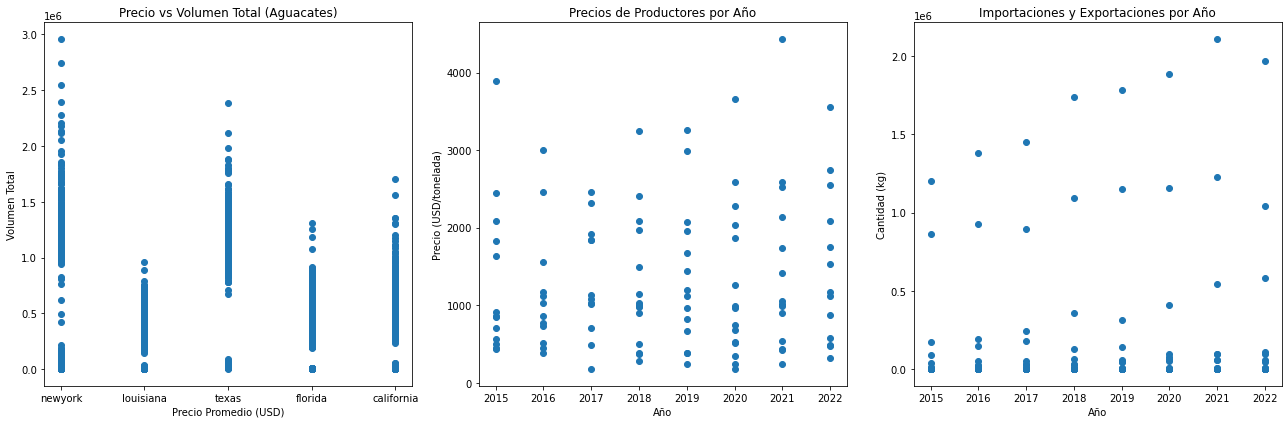

In [14]:
# Graficar dispersión para detección de outliers
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Scatter Plot 1: Precio vs Volumen Total (Aguacates)
#ax[0].scatter(df_avocado_hotels['AveragePrice'], df_avocado_hotels['Total Volume'])
ax[0].scatter(df_avocado_hotels['location'], df_avocado_hotels['Total Volume'])

ax[0].set_title("Precio vs Volumen Total (Aguacates)")
ax[0].set_xlabel("Precio Promedio (USD)")
ax[0].set_ylabel("Volumen Total")

# Scatter Plot 2: Precio de Productores por Año
ax[1].scatter(df_producer_prices['Year'], df_producer_prices['Value'])
ax[1].set_title("Precios de Productores por Año")
ax[1].set_xlabel("Año")
ax[1].set_ylabel("Precio (USD/tonelada)")

# Scatter Plot 3: Importaciones vs Exportaciones (Ganado)
df_import_export = df_livestock[df_livestock['Element'].isin(['Import Quantity','Export Quantity'])]
ax[2].scatter(df_import_export['Year'], df_import_export['Value'])
ax[2].set_title("Importaciones y Exportaciones por Año")
ax[2].set_xlabel("Año")
ax[2].set_ylabel("Cantidad (kg)")

plt.tight_layout()
plt.show()



In [15]:
# Verificar fechas comunes
date_check = {
    'avocado_dates': (df_avocado_hotels['Date'].min(), df_avocado_hotels['Date'].max()),
    'producer_prices_years': (df_producer_prices['Year'].min(), df_producer_prices['Year'].max()),
    'livestock_years': (df_livestock['Year'].min(), df_livestock['Year'].max())
}
date_check

{'avocado_dates': (Timestamp('2015-01-04 00:00:00'),
  Timestamp('2018-03-25 00:00:00')),
 'producer_prices_years': (2015, 2022),
 'livestock_years': (2015, 2022)}